
**Dictionary for BK digital loan data**


**Customer Id**             :Customer's identification number

**Date of Birth**           :Customer's date of birth

**Province**               :Province in which the national Id was issued

**District**                :District in which the national Id was issued

**Customer Branch**         :Branch in which the account was opened

**Principal amt**           :Disbursed loan amount

**Paid principal**          :Amount paid of the disbursed amount

**Paid Interest**           :Interest paid on the loan

**Paid Penalty**            :Penalty paid due to late payment

**Total Remaining prinipal**:Total outstanding amount of the loan

**Remaining principal**     :Outstanding amount minus amount for the                                         nextinstallement

**Amount due**            :Total amount due for the current installemnet (due                              principal plus interest)

**Due Principal**          :Due amount of the principal for the current                                     installement (does not include interest)

**Due interest**            :Interest amount due for the current installement

**Due pen interest**        :Due penality interest for the current installement 

**Due Fee**                 :Processing fee paid on disbursement (1% of the principal amount on loans disbursed after 26th April 2019)

**Paid Fee**                :Same as Due fee

**Overdue Days**            :Days passed without paying due amount for each 
                             installement
                             
**Effective Date**          :Loan value date

**Maturity Date**           :Date  after which the loan expires if not paid

**CreditScoreGroup**        :Credit score to which a given customer belongs to.

**PaymentStatus**           :The status of the customer's current loan

**Duration**               :Loan duration in months

**ReturningCustomer**     :Indicates whether a custoner is returnig or new

**Class**             :Customer's class depending on the number of overdue days

                             *overdue days they have*                        
					Overdue Days >= 1 & Overdue Days < 30: Acceptable Risk     
					Overdue Days >= 30 & Overdue Days < 90: Special Mention
					Overdue Days >= 90 & Overdue Days < 180: Substandard
					Overdue Days >= 180  & Overdue Days < 360: Doubtful
					Overdue Days >= 360: Loss
					Overdue Days = 0: Normal
<br />




## The below Report is divided into 3 main sections namely:

### 1. Initialize Libraries, Load Data & Preprocess
### 2. Exploratory Data Analysis and Visualization
### 3. Predictive Modeling(predicting credit score)

- ### Goal of the study is to create a machine learning based model that predicts credit score of a client.
- ### This is a Supervised regression problem. Where credit score A(0), B(1) and C(2) is the dependant variable

To find the predictability of a creditscore our main objective is to find what features can play a role to predict a CreditscoreGroup? Therefore we need to find answers to some questions like:
- **1.** Is the % of CreditScoreGroup significantly different from Paid Penalty,?
- **2.** How does Duration effect the proportion of CreditScoreGroup ?
- **3.** Does the ReturningCustomer play a role in the % of CreditScoreGroup?
- **4.** Which age group constitutes for higher proportion of CreditScoreGroup ?
- **5.** Is the number of CreditScoreGroup correlated with Due pen interest  ?
- **6.** Is there a pattern in PaymentStatusstatuses which can help predict probability of a CreditScoreGroup ?
- **7.** Does the Total Remaining prinipal amount has a correlation with the % of CreditScoreGroup?

#### Import the required Packages 

In [1]:
import scipy

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
#import savReaderWriter as sav
#import the evaluatation metric
from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline

from sklearn.metrics import confusion_matrix, recall_score, precision_score

import seaborn as sns
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore') # to supress warnings
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
# Read the data into DataFrames.
LOANDATA0=pd.read_csv("LOANDATA.csv")
# Breif look at the data
LOANDATA0.head()

,Unnamed: 0,Customer Id,Date of Birth,Province,District,Customer Branch,Principal amt,Paid principal,Paid Interest,Paid Penalty,Total Remaining prinipal,Remaining principal,Amount due,Due Principal,Due interest,Due pen interest,Due Fee,Paid Fee,Due TAX,Paid Tax,Previous Days,Overdue Days,Effective Date,Maturity Date,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer,Class
0,0,846078,19910611,NaN,NaN,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False,NaN
1,1,846100,19910321,NaN,NaN,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False,NaN
2,2,851947,19880209,NaN,NaN,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180103,20180203,B,Completely Repaid,1,False,NaN
3,3,1333968,19841006,NaN,NaN,40,1000,1000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False,NaN
4,4,862504,19780423,NaN,NaN,46,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False,NaN


In [83]:
LOANDATA=LOANDATA0.drop(["Province","District","Unnamed: 0","Customer Id","Class"],axis=1)
LOANDATA.head()

,Date of Birth,Customer Branch,Principal amt,Paid principal,Paid Interest,Paid Penalty,Total Remaining prinipal,Remaining principal,Amount due,Due Principal,Due interest,Due pen interest,Due Fee,Paid Fee,Due TAX,Paid Tax,Previous Days,Overdue Days,Effective Date,Maturity Date,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer
0,19910611,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
1,19910321,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
2,19880209,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180103,20180203,B,Completely Repaid,1,False
3,19841006,40,1000,1000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False
4,19780423,46,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False


In [84]:
#Check feaures of the data , data types and number of rows for each column
LOANDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58096 entries, 0 to 58095
Data columns (total 24 columns):
Date of Birth               58096 non-null int64
Customer Branch             58096 non-null int64
Principal amt               58096 non-null int64
Paid principal              58096 non-null int64
Paid Interest               58096 non-null int64
Paid Penalty                58096 non-null int64
Total Remaining prinipal    58096 non-null int64
Remaining principal         58096 non-null int64
Amount due                  58096 non-null int64
Due Principal               58096 non-null int64
Due interest                58096 non-null int64
Due pen interest            58096 non-null int64
Due Fee                     58096 non-null int64
Paid Fee                    58096 non-null int64
Due TAX                     58096 non-null int64
Paid Tax                    58096 non-null int64
Previous Days               58096 non-null int64
Overdue Days                58096 non-null int64
Effective

In [85]:
#View some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
LOANDATA.describe()

,Date of Birth,Customer Branch,Principal amt,Paid principal,Paid Interest,Paid Penalty,Total Remaining prinipal,Remaining principal,Amount due,Due Principal,Due interest,Due pen interest,Due Fee,Paid Fee,Due TAX,Paid Tax,Previous Days,Overdue Days,Effective Date,Maturity Date,Duration
count,5.809600e+04,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,58096.000000,5.809600e+04,5.809600e+04,58096.000000
mean,1.985588e+07,114.014889,105890.416225,89910.938602,6792.179014,72.593879,15979.477623,4454.586564,12794.345394,11524.891060,1138.887204,130.567130,110.909925,110.669667,19.964731,19.864104,6.306286,15.546303,2.018517e+07,2.018776e+07,3.527472
std,7.485920e+04,95.794778,139963.369418,128176.857900,13284.095675,358.690175,65915.018920,26802.318880,64316.807923,57314.758314,6961.037749,781.127525,532.820061,531.988416,95.908543,95.650429,18.965630,49.480788,4.721501e+03,4.341632e+03,2.239780
min,1.952082e+07,40.000000,1000.000000,-6000.000000,0.000000,0.000000,0.000000,-106000.000000,0.000000,-4733.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.017123e+07,2.018013e+07,1.000000
25%,1.982022e+07,47.000000,17000.000000,12300.000000,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018081e+07,2.018121e+07,1.000000
50%,1.987010e+07,60.000000,50000.000000,37600.000000,1422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.018122e+07,2.019032e+07,3.000000
75%,1.991010e+07,255.000000,130000.000000,101482.000000,6485.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.019031e+07,2.019062e+07,6.000000
max,2.001041e+07,294.000000,1000000.000000,1000000.000000,136306.000000,19726.000000,708527.000000,347358.000000,712934.000000,708527.000000,74463.000000,35388.000000,5000.000000,5000.000000,900.000000,900.000000,188.000000,361.000000,2.019053e+07,2.019113e+07,12.000000


In [86]:
#Check total number of rows and columns within dataframe
LOANDATA.shape

(58096, 24)

### Exploratory data analysis of a Pandas Dataframe with pandas profiling

In [87]:
#import pandas_profiling as pp
#pp.ProfileReport(LOANDATA)

In [88]:
LOANDATA.isnull().sum()

Date of Birth               0
Customer Branch             0
Principal amt               0
Paid principal              0
Paid Interest               0
Paid Penalty                0
Total Remaining prinipal    0
Remaining principal         0
Amount due                  0
Due Principal               0
Due interest                0
Due pen interest            0
Due Fee                     0
Paid Fee                    0
Due TAX                     0
Paid Tax                    0
Previous Days               0
Overdue Days                0
Effective Date              0
Maturity Date               0
CreditScoreGroup            0
PaymentStatus               0
Duration                    0
ReturningCustomer           0
dtype: int64

In [89]:
LOANDATA.shape

(58096, 24)

From above data analysis explored using pandas profiling shows that Due TAX,Due interest,Due Principal,Paid Fee and Paid Tax are highly correlated to each other, but very less correlation to target label 'CreditScoreGroup '. When data is huge to save computational resource, such features can be dropped without losing significant prediction power.

Class has Missing values 49613 (%) which is equal 85.4% of total data thus we can drop column since since the missing values is quite significant.



In [90]:
#Checking further infomation about CreditScoreGroup
LOANDATA.CreditScoreGroup.value_counts()

B    24308
A    17828
C    15960
Name: CreditScoreGroup, dtype: int64

In [91]:
#Checking further infomation about Province
#LOANDATA.Province.value_counts()

In [92]:
#Checking further infomation about Class
#LOANDATA.Class.value_counts()

### Checking the total number of missing values from each column within the dataframe 

In [93]:
LOANDATA.isna().sum()

Date of Birth               0
Customer Branch             0
Principal amt               0
Paid principal              0
Paid Interest               0
Paid Penalty                0
Total Remaining prinipal    0
Remaining principal         0
Amount due                  0
Due Principal               0
Due interest                0
Due pen interest            0
Due Fee                     0
Paid Fee                    0
Due TAX                     0
Paid Tax                    0
Previous Days               0
Overdue Days                0
Effective Date              0
Maturity Date               0
CreditScoreGroup            0
PaymentStatus               0
Duration                    0
ReturningCustomer           0
dtype: int64

#### Graphical representation of data where the individual values contained in a matrix are represented using heatmap to check missing vallues

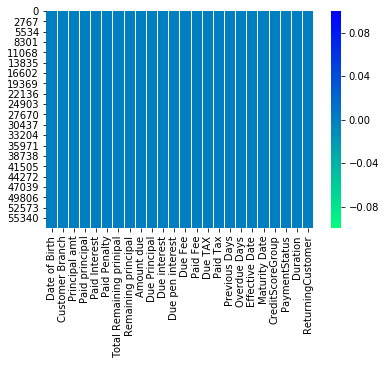

In [94]:
sns.heatmap(LOANDATA.isnull(),cmap="winter_r")

We can see alot of missing values wthin class column and some few missing values in province and district columns

In [95]:
#Making a copy of loandata so that we can utilize the copy for further feature enginneering
LOANDATA1=LOANDATA.copy()

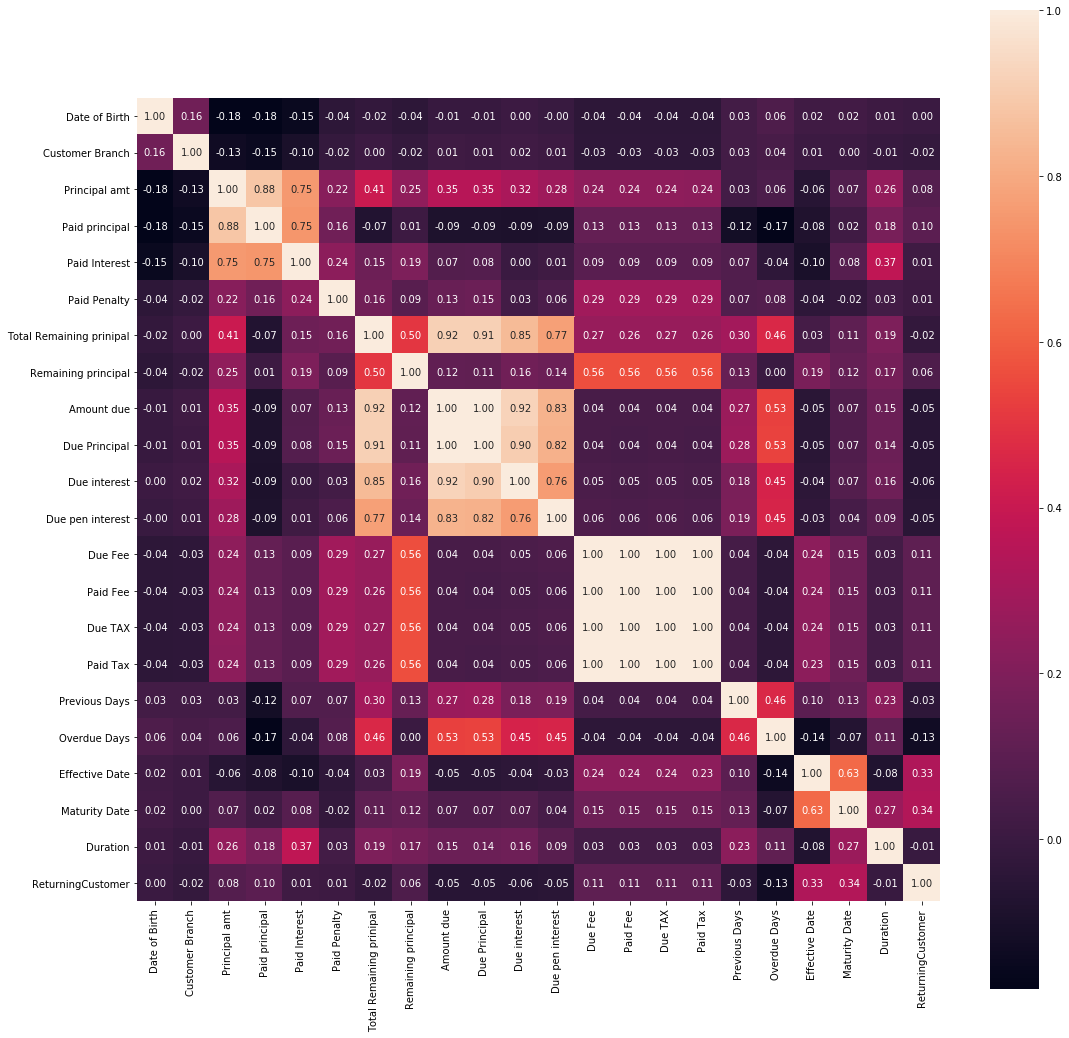

In [96]:

cor = LOANDATA1.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

In [97]:
#replacing spaced words in culumns (' ', '_')  with underscore for ease 
LOANDATA1.columns =LOANDATA1.columns.str.strip().str.replace(' ', '_')
LOANDATA1.head(3)

,Date_of_Birth,Customer_Branch,Principal_amt,Paid_principal,Paid_Interest,Paid_Penalty,Total_Remaining_prinipal,Remaining_principal,Amount_due,Due_Principal,Due_interest,Due_pen_interest,Due_Fee,Paid_Fee,Due_TAX,Paid_Tax,Previous_Days,Overdue_Days,Effective_Date,Maturity_Date,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer
0,19910611,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
1,19910321,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
2,19880209,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180103,20180203,B,Completely Repaid,1,False


In [98]:
#LOANDATA1.Class.value_counts()

In [99]:
LOANDATA1.head()

,Date_of_Birth,Customer_Branch,Principal_amt,Paid_principal,Paid_Interest,Paid_Penalty,Total_Remaining_prinipal,Remaining_principal,Amount_due,Due_Principal,Due_interest,Due_pen_interest,Due_Fee,Paid_Fee,Due_TAX,Paid_Tax,Previous_Days,Overdue_Days,Effective_Date,Maturity_Date,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer
0,19910611,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
1,19910321,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,20171228,20180128,B,Completely Repaid,1,False
2,19880209,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180103,20180203,B,Completely Repaid,1,False
3,19841006,40,1000,1000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False
4,19780423,46,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20180105,20180205,B,Completely Repaid,1,False


### Checking class Imbalance

Class 0: 24308
Class 1: 17828
Class 2: 15960
Proportion: 0.719 : 1


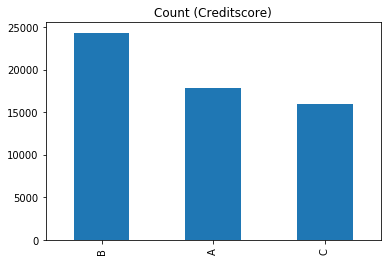

In [100]:
Creditscore_count =LOANDATA1.CreditScoreGroup.value_counts()
print('Class 0:', Creditscore_count[0])
print('Class 1:', Creditscore_count[1])
print('Class 2:', Creditscore_count[2])
print('Proportion:', round(Creditscore_count[0] / (Creditscore_count[1]+Creditscore_count[2]), 3), ': 1')

Creditscore_count.plot(kind='bar', title='Count (Creditscore)');

**From above class imbalance check we can see that prorpotion is 0.72 which 72% this shows that data fairly distributed thus may not couse advesre effect on accuracy**

**Dropping the column of  class has Missing values 49613 (%) which is equal 85.4% of total data thus we can drop column since since the missing values is quite significant**

### Converting  Categorical data to Numerical

In [101]:
LOANDATA1["CreditScoreGroup"]=LOANDATA1["CreditScoreGroup"].map({"A": 0, "B": 1, "C": 2}).astype(int)

In [102]:
LOANDATA1["PaymentStatus"]=LOANDATA1["PaymentStatus"].str.strip().str.replace(' ', '_')

In [103]:
LOANDATA1["PaymentStatus"]=LOANDATA1["PaymentStatus"].map({"Completely_Repaid":0,"Partially_Repaid":1,"In_arrears":2,"Not_yet":3}).astype(int)

In [104]:
LOANDATA1["ReturningCustomer"]=(LOANDATA1["ReturningCustomer"]).astype(int)

In [113]:
LOANDATA4=LOANDATA1.drop(['Effective_Date','Maturity_Date','Date_of_Birth'], axis=1)
LOANDATA4.head()

,Customer_Branch,Principal_amt,Paid_principal,Paid_Interest,Paid_Penalty,Total_Remaining_prinipal,Remaining_principal,Amount_due,Due_Principal,Due_interest,Due_pen_interest,Due_Fee,Paid_Fee,Due_TAX,Paid_Tax,Previous_Days,Overdue_Days,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer
0,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,40,1000,1000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,46,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [114]:
LOANDATA4.to_csv(r'C:\Users\HP\Desktop\IBM Data Science Professional/Bankdata.csv')

### Visualize Data with t-SNE

t-SNE is a technique for dimensionality reduction that is well suited to visualise high-dimensional datasets. Lets have a first look on the map that will set some expectations for the prediction accuracy i.e. if our dataset has many overlaps it would be good if our model achieves an accuracy of 60-70%.!

Class 0: 17828
Class 1: 24308
Class 2: 15960
Proportion: 0.443 : 1


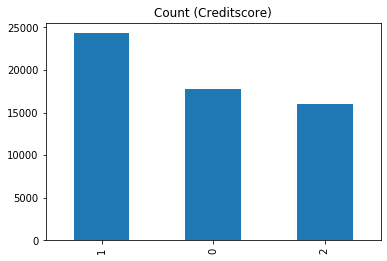

In [82]:
#Set df4 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df1 = LOANDATA4[LOANDATA1.CreditScoreGroup == 0].sample(n = 1000)
df2 = LOANDATA4[LOANDATA1.CreditScoreGroup == 1].sample(n = 1000)
df3 = LOANDATA4[LOANDATA1.CreditScoreGroup == 2].sample(n = 1000)
df4 = pd.concat([df1,df2,df3], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

#Set y equal to the target values.
y = df4.CreditScoreGroup

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

Creditscore_count =LOANDATA1.CreditScoreGroup.value_counts()
print('Class 0:', Creditscore_count[0])
print('Class 1:', Creditscore_count[1])
print('Class 2:', Creditscore_count[2])
print('Proportion:', round(Creditscore_count[0] / (Creditscore_count[1]+Creditscore_count[2]), 3), ': 1')

Creditscore_count.plot(kind='bar', title='Count (Creditscore)');

### Build the scatter plot to show dataset distribution and model  accuracy  

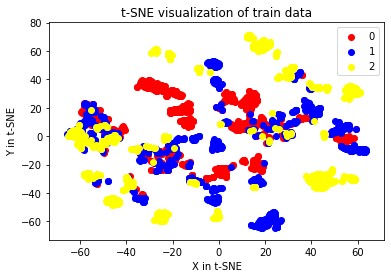

In [27]:
#Build the scatter plot with the three types of transactions.
color_map = {0:'red', 1:'blue',2:'yellow'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], y = x_test_2d[y==cl,1], c = color_map[idx], label = cl)
    #plt.scatter(x = x_test_2d[y==cl,0], y = x_test_2d[y==cl,2], c = color_map[idx], label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
plt.title('t-SNE visualization of train data')
plt.show()

**Plotting histogram od loan data to check data distribution**

<Figure size 720x720 with 0 Axes>

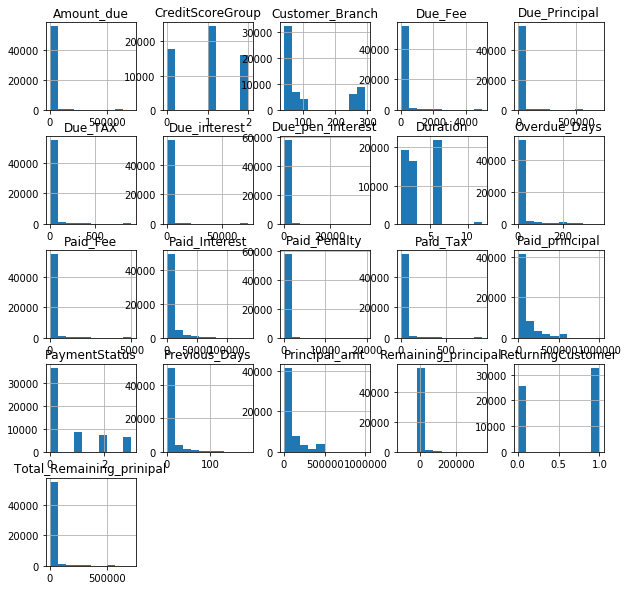

In [28]:
plt.figure(figsize=(10,10));
LOANDATA4.hist(figsize=(10,10));

**The plot reveals a rather mixed up dataset which means we should not expect very accurate model.**

- **Now let us check the correlation between different features**

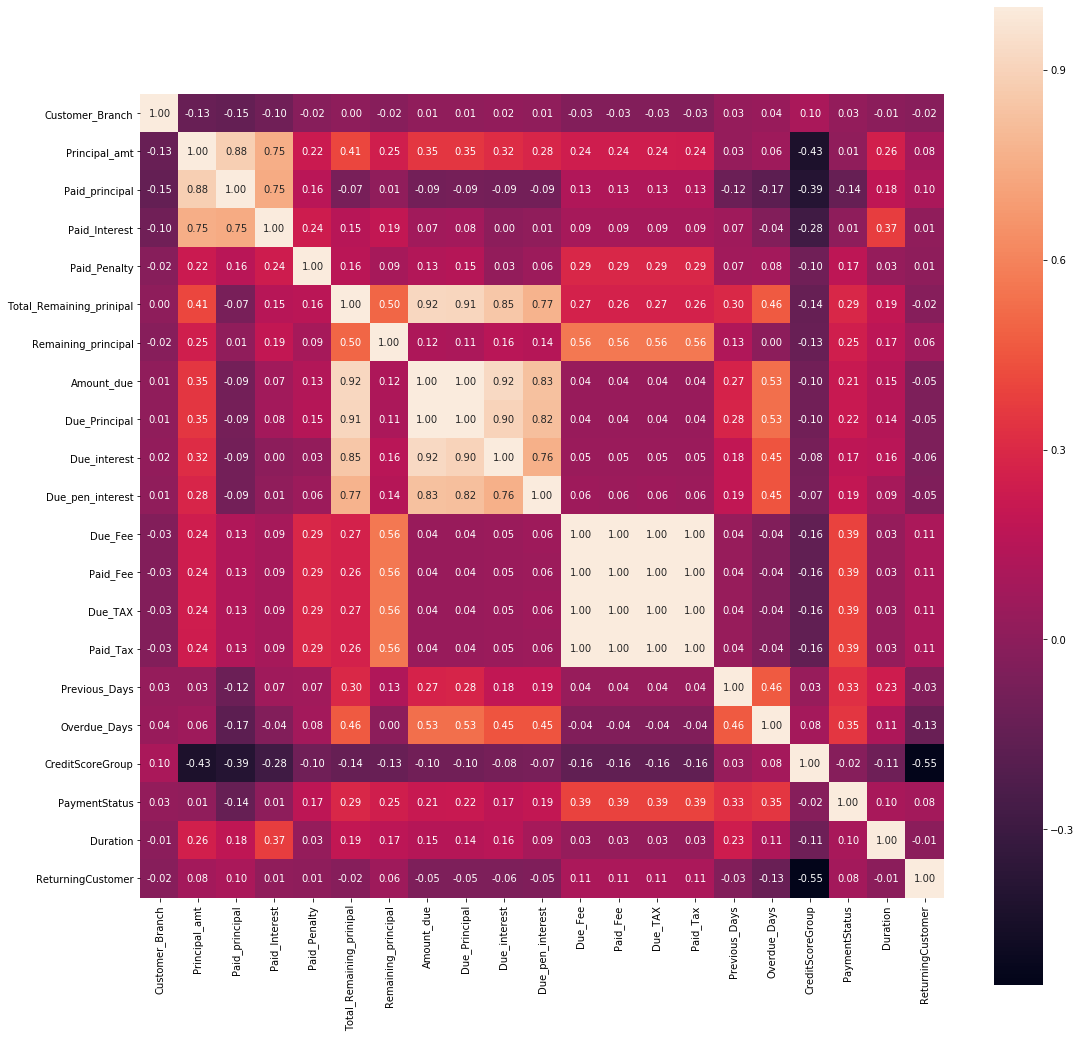

In [29]:

cor = LOANDATA4.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

From above data analysis explored using pandas profiling shows that Due TAX,Due interest,Due Principal,Paid Fee and Paid Tax are highly correlated to each other, but very less correlation to target label 'CreditScoreGroup '. When data is huge to save computational resource, such features can be dropped without losing significant prediction power.

'Overdue Days' show highest contribution to the CreditscoreGroup label

- **We can see above that Overdue Days,Previous Days,Customer Branch...have high positive correlation to 'CreditScoreGroup ' and ReturningCustomer has pretty high negative correlation**

### Feature Engineering

#### 1. Is the % of CreditScoreGroup significantly different between Completely Repaid	Partially Repaid	In arrears	Not yet customers ?


In [39]:
PaymentStatus_crosstab = pd.crosstab(LOANDATA4['PaymentStatus'],LOANDATA4['CreditScoreGroup'], margins=True, normalize=False)
new_index = {0:"Completely_Repaid",1:"Partially_Repaid",2:"In_arrears",3:"Not_yet"}
new_columns = {0: 'A', 1:'B',2: 'C', }
PaymentStatus_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
PaymentStatus_crosstab/PaymentStatus_crosstab.loc['All']

CreditScoreGroup,A,B,C,All
PaymentStatus,,,,
Completely_Repaid,0.594346,0.636251,0.633333,0.622590
Partially_Repaid,0.183419,0.140489,0.116541,0.147084
In_arrears,0.091429,0.117533,0.164223,0.122349
Not_yet,0.130805,0.105727,0.085902,0.107976
All,1.000000,1.000000,1.000000,1.000000


**We can see customers in A whose payment is in arrears has lowest credit score while customers who have partially paid has highest credit score**

**We can see customers in B whose payment status is Completely Repaid has higher credit score while customers who have partially paid has lowest credit score**

**We can see customers in C whose payment status is In arrearsd has higher credit score while customers who have partially paid has lower credit score**



In [41]:
ReturningCustomer_crosstab = pd.crosstab(LOANDATA4['PaymentStatus'], LOANDATA4['ReturningCustomer'], margins=True, normalize=False)
new_index = {0:"Completely_Repaid",1:"Partially_Repaid",2:"In_arrears",3:"Not_yet"}
new_columns = {0: 'False', 1:'True'}
ReturningCustomer_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
ReturningCustomer_crosstab/ReturningCustomer_crosstab.loc['All']

ReturningCustomer,False,True,All
PaymentStatus,,,
Completely_Repaid,0.665142,0.589113,0.622590
Partially_Repaid,0.109652,0.176534,0.147084
In_arrears,0.162347,0.090881,0.122349
Not_yet,0.062859,0.143472,0.107976
All,1.000000,1.000000,1.000000


**We can see Returning customers in A higher credit score while customers who are not returning has lowest credit score**

**We can see Returning customers in B higher credit score while customers who are not returning has lowest credit score**

**We can see Returning customers in C has lowest credit score while customers who are not returning  higher credit score**


In [42]:
pen_interest_crosstab = pd.crosstab(LOANDATA4['PaymentStatus'], LOANDATA4['Due_pen_interest'], margins=True, normalize=False)
new_index = {0:"Completely_Repaid",1:"Partially_Repaid",2:"In_arrears",3:"Not_yet"}
new_columns = {}
pen_interest_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
pen_interest_crosstab/pen_interest_crosstab.loc['All']

Due_pen_interest          0         1         2         3         4         5  \
PaymentStatus                                                                   
Completely_Repaid  0.727264  0.005155  0.007812  0.009259  0.018182  0.000000   
Partially_Repaid   0.117674  0.762887  0.742188  0.768519  0.690909  0.610390   
In_arrears         0.067415  0.072165  0.109375  0.092593  0.090909  0.168831   
Not_yet            0.087647  0.159794  0.140625  0.129630  0.200000  0.220779   
All                1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Due_pen_interest          6         7         8         9        10        11  \
PaymentStatus                                                                   
Completely_Repaid  0.025974  0.000000  0.015385  0.000000  0.000000  0.000000   
Partially_Repaid   0.584416  0.700000  0.569231  0.694444  0.568627  0.482759   
In_arrears         0.090909  0.066667  0.153846  0.152778  0.098039  0.206897   
Not_yet            0.298701  0.233333  0.261538  0.152778  0.333333  0.310345   
All                1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Due_pen_interest         12    13        14    15        16        17  \
PaymentStatus                                                           
Completely_Repaid  0.000000  0.00  0.000000  0.00  0.000000  0.000000   
Partially_Repaid   0.527273  0.50  0.603774  0.46  0.282609  0.413793   
In_arrears         0.236364  0.25  0.094340  0.26  0.239130  0.344828   
Not_yet            0.236364  0.25  0.301887  0.28  0.478261  0.241379   
All                1.000000  1.00  1.000000  1.00  1.000000  1.000000   

Due_pen_interest         18        19        20        21        22        23  \
PaymentStatus                                                                   
Completely_Repaid  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Partially_Repaid   0.557692  0.407407  0.365385  0.357143  0.461538  0.400000   
In_arrears         0.211538  0.277778  0.250000  0.357143  0.230769  0.222222   
Not_yet            0.230769  0.314815  0.384615  0.285714  0.307692  0.377778   
All                1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Due_pen_interest         24        25     26    27        28        29  \
PaymentStatus                                                            
Completely_Repaid  0.000000  0.000000  0.000  0.00  0.000000  0.000000   
Partially_Repaid   0.424242  0.454545  0.625  0.32  0.413043  0.380952   
In_arrears         0.333333  0.212121  0.125  0.32  0.239130  0.285714   
Not_yet            0.242424  0.333333  0.250  0.36  0.347826  0.333333   
All                1.000000  1.000000  1.000  1.00  1.000000  1.000000   

Due_pen_interest         30        31        32        33        34        35  \
PaymentStatus                                                                   
Completely_Repaid  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Partially_Repaid   0.317073  0.285714  0.333333  0.342105  0.290323  0.241379   
In_arrears         0.390244  0.314286  0.333333  0.342105  0.483871  0.517241   
Not_yet            0.292683  0.400000  0.333333  0.315789  0.225806  0.241379   
All                1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Due_pen_interest         36    37        38        39    40        41  \
PaymentStatus                                                           
Completely_Repaid  0.000000  0.00  0.000000  0.000000  0.00  0.000000   
Partially_Repaid   0.400000  0.50  0.236842  0.517241  0.20  0.421053   
In_arrears         0.333333  0.25  0.289474  0.310345  0.45  0.210526   
Not_yet            0.266667  0.25  0.473684  0.172414  0.35  0.368421   
All                1.000000  1.00  1.000000  1.000000  1.00  1.000000   

Due_pen_interest         42        43        44        45        46        47  \
PaymentStatus                                                                   
Completely_Repaid  0.00

**From above table customers in A whose Due penality interest is zero has highest credit score than those customers with Due penality interest**

**customers in B shows some mixed credit score based on  Due penality interest but we can see on most cases credit score is higher on section with Due penality interest**

**customers in C whose Due penality interest is zero has lower credit score than those customers with Due penality interest since with Due penality interest highest credit score**


In [34]:
LOANDATA4.head()

,Customer_Branch,Principal_amt,Paid_principal,Paid_Interest,Paid_Penalty,Total_Remaining_prinipal,Remaining_principal,Amount_due,Due_Principal,Due_interest,Due_pen_interest,Due_Fee,Paid_Fee,Due_TAX,Paid_Tax,Previous_Days,Overdue_Days,CreditScoreGroup,PaymentStatus,Duration,ReturningCustomer
0,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,40,1000,1000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,40,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,40,1000,1000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,46,1000,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [43]:
age_crosstab = pd.crosstab(LOANDATA4['PaymentStatus'], LOANDATA4['Customer_Branch'], margins=True, normalize=False)
new_index = {0:"Completely_Repaid",1:"Partially_Repaid",2:"In_arrears",3:"Not_yet"}
new_columns = {}
age_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
age_crosstab/age_crosstab.loc['All']

Customer_Branch,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,85,86,87,88,89,90,91,92,93,94,95,96,97,98,255,256,257,258,259,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,All
PaymentStatus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Completely_Repaid,0.673406,0.6240,0.627469,0.623919,0.629738,0.623853,0.613260,0.649190,0.626984,0.592803,0.600806,0.616466,0.603431,0.625551,0.619308,0.636364,0.669405,0.588553,0.626730,0.630303,0.633687,0.554545,0.614873,0.588652,0.554656,0.607266,0.628755,0.592668,0.584980,0.604317,0.609375,0.650485,0.655019,0.609756,0.660377,0.567239,0.616361,0.548148,0.549932,0.605311,0.672447,0.0,0.641221,0.547923,0.664847,0.596970,0.683363,0.657016,0.578125,1.0,0.572254,0.601695,0.546154,0.638889,0.649203,0.601485,0.610738,0.592255,0.579143,0.333333,0.0,0.388889,0.680851,0.411765,0.538168,0.617978,0.655914,0.585366,0.587580,0.618644,0.606061,0.510345,0.567198,0.621762,0.264423,0.55496,0.636769,0.333333,0.599222,0.598276,0.586667,0.633874,0.622590
Partially_Repaid,0.141191,0.1424,0.125673,0.136888,0.132653,0.135498,0.169890,0.133385,0.132275,0.147727,0.170968,0.148594,0.141271,0.147577,0.167577,0.130682,0.118070,0.155508,0.159505,0.140152,0.141343,0.181818,0.139057,0.151300,0.141700,0.159170,0.130901,0.154786,0.142292,0.178417,0.187500,0.142857,0.152416,0.175610,0.137466,0.148784,0.145275,0.214815,0.161423,0.182234,0.111753,1.0,0.148855,0.151757,0.123362,0.166667,0.130590,0.111359,0.210938,0.0,0.177264,0.141243,0.223077,0.145833,0.138952,0.155941,0.154362,0.148064,0.135940,0.444444,1.0,0.111111,0.063830,0.176471,0.179389,0.123596,0.146953,0.219512,0.114650,0.203390,0.136364,0.248276,0.207289,0.134715,0.206731,0.19571,0.117549,0.095238,0.116732,0.150000,0.181667,0.143002,0.147084
In_arrears,0.083093,0.1136,0.118492,0.139769,0.122449,0.126323,0.122928,0.119507,0.105820,0.141098,0.125000,0.110442,0.150353,0.114537,0.109290,0.130682,0.104723,0.146868,0.108886,0.119697,0.124853,0.181818,0.127570,0.141844,0.182186,0.143599,0.120172,0.150713,0.183136,0.106475,0.098958,0.106796,0.078067,0.112195,0.110512,0.199571,0.150917,0.113580,0.142271,0.115385,0.132948,0.0,0.137405,0.174121,0.087336,0.133333,0.090340,0.130290,0.125000,0.0,0.109827,0.175141,0.146154,0.102431,0.095672,0.141089,0.104027,0.132118,0.176909,0.222222,0.0,0.277778,0.127660,0.235294,0.125954,0.179775,0.107527,0.097561,0.157643,0.067797,0.136364,0.117241,0.116173,0.145078,0.432692,0.10992,0.147632,0.190476,0.163424,0.155172,0.103333,0.093306,0.122349
Not_yet,0.102311,0.1200,0.128366,0.099424,0.115160,0.114326,0.093923,0.097918,0.134921,0.118371,0.103226,0.124498,0.104945,0.112335,0.103825,0.102273,0.107803,0.109071,0.104880,0.109848,0.100118,0.081818,0.118501,0.118203,0.121457,0.089965,0.120172,0.101833,0.089592,0.110791,0.104167,0.099861,0.114498,0.102439,0.091644,0.084406,0.087447,0.123457,0.146375,0.097070,0.082852,0.0,0.072519,0.126198,0.124454,0.103030,0.095707,0.101336,0.085938,0.0,0.140655,0.081921,0.084615,0.112847,0.116173,0.101485,0.130872,0.127563,0.108007,0.000000,0.0,0.222222,0.127660,0.176471,0.156489,0.078652,0.089606,0.097561,0.140127,0.110169,0.121212,0.124138,0.109339,0.098446,0.096154,0.13941,0.098050,0.380952,0.120623,0.096552,0.128333,0.129817,0.107976
All,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

**We can see customers in A whose  age is between 28 to 36 have high credt score**  

**We can see customers in B whose  age is between 19 to 62 have high credt score**

**In C customer at age of 18 has high credit score than the rest , also credit score reduces has age increases**

In [44]:
Duration_crosstab = pd.crosstab(LOANDATA4['PaymentStatus'], LOANDATA4['Duration'], margins=True, normalize=False)
new_index = {0:"Completely_Repaid",1:"Partially_Repaid",2:"In_arrears",3:"Not_yet"}
new_columns = {}
Duration_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
Duration_crosstab/Duration_crosstab.loc['All']

Duration,1,3,6,9,12,All
PaymentStatus,,,,,,
Completely_Repaid,0.767971,0.634051,0.478921,0.966667,0.944724,0.622590
Partially_Repaid,0.001807,0.135329,0.287289,0.000000,0.007538,0.147084
In_arrears,0.127092,0.121334,0.120393,0.033333,0.047739,0.122349
Not_yet,0.103130,0.109286,0.113397,0.000000,0.000000,0.107976
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* **We can see customers in A whose  Loan duration are 6  months have high credt score**  

**We can see customers in B whose  Loan duration are 12  months have high credt score** 

**We can see customers in C whose  Loan duration are 1  month have high credt score** 

**Splitting data into train and test set and checking the accuracy**

In [125]:
x= LOANDATA4.drop(columns=['CreditScoreGroup','Due_Principal','Due_interest',
                            'Due_Fee','Paid_Fee','Due_TAX','Paid_Tax'],axis = 1)
Y = LOANDATA4.CreditScoreGroup
scaler=StandardScaler()
X=scaler.fit(x).transform(x)
# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

******Here we are first trying out below listed classification models to get the first look at accuracy**

In [126]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier()
}

In [127]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.707129,0.701607,0.701369,0.695783
1,GaussianNB,0.500039,0.465313,0.376351,0.407487
2,RandomForest,0.743083,0.740671,0.741238,0.734509
3,DecisionTreeClassifier,0.685728,0.688591,0.687073,0.679862
4,SVM,0.767562,0.747102,0.755400,0.750688
5,KNeighborsClassifier,0.732387,0.727551,0.729448,0.722461


### Ensemble Framework Overview
Ensemble learning is a machine learning paradigm in which a number of learners are trained
to solve the same problem with the goal of obtaining better predictive accuracy than could have
been achieved from any of the constituent learning models alone [Zhou, 2015]. It is a well-established
and widely employed methodology designed to enhance the generalizable signal by averaging out
noise from a diverse set of models.

### Function to optimize model using gridsearch

In [128]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print( 'Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[0,1,2]))
    conf = pd.DataFrame(conmat, index=['A', 'B','C'],
                             columns=['Predicted A', 'Predicted B','Predicted C'])
    print( conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    #prob = md.predict_proba(x_test)[:,1]
    print( ' ' )
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print( 'Accuracy on Test set: ', md.score(x_test, y_test))
    print( ' ')
    print(classification_report(y_test, pred))
    print( ' ')
    print('Confusion Matrix',confmat(pred, y_test))
    
    #roc(prob, y_test)
    return md

**Splitting data into train test and validation set and checking the accuracy**